# Variables

Esta tabla contiene la información de los expresiones Variables.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('variables')

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic', 'variable__expertise_level']
TABLE_TARGET = 'variable__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-07-04 19:36:05.386944 Data cache files found ...
2024-07-04 19:36:05.830681 Data cache files successfully loaded!!
Features shape: (2862305, 5)
Target shape: (2862305,)
As we can see the downloaded data contains a total of 2862305 instances. For each instance we have 5 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862305 entries, 0 to 2862304
Data columns (total 5 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   variable__name_convention       object
 1   variable__number_of_characters  int64 
 2   variable__is_private            bool  
 3   variable__is_magic              bool  
 4   variable__expertise_level       object
dtypes: bool(2), int64(1), object(2)
memory usage: 71.0+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2862305 entries, 0 to 2862304
Series name: variable__expertise_level
Non-Null Count    Dtype 
--------------    ----- 
2862305 non-null  object
dtypes: object(1)
memory usage: 21.8+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 40.81% instances for BEGINNER class and 59.19% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
variable__expertise_level         0
dtype: int64

In [5]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic


variable__expertise_level
-------------------------
0 instancias no tienen un valor para la columna variable__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,2862305,7,Lower,1866159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,2862305.0,NaN,NaN,NaN,7.118826,5.179806,1.0,4.0,5.0,10.0,82.0
variable__is_private,2862305,2,False,2817670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,2862305,2,False,2843026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__expertise_level,2862305,2,EXPERT,1694338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(full_table, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 981455   34.288973
                    [10.0_inf] 725323   25.340521
                     [0.0_4.0) 598926   20.924604
                     [4.0_4.0] 556601   19.445901

variable__name_convention   count  percentage
                    Lower 1866159   65.197769
                SnakeCase  616656   21.544035
                  CamelUp  211660    7.394740
                    Upper   81005    2.830062
                 CamelLow   65577    2.291056
         NoNameConvention   12444    0.434755
                  Discard    8804    0.307584

 variable__is_private   count  percentage
                False 2817670   98.440592
                 True   44635    1.559408

 variable__is_magic   count  percentage
              False 2843026   99.326452
               True   19279    0.673548

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (2862305, 12)
Target shape: (2862305,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

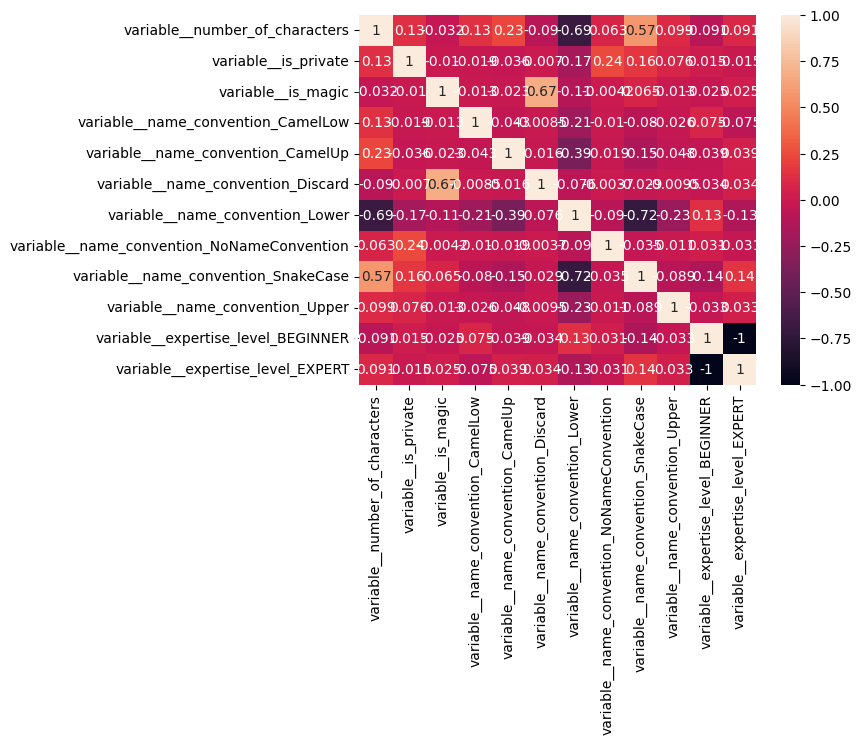

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variables (1 numerica, 2 booleanas y 1 categorica) se hara un analisis detallado

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

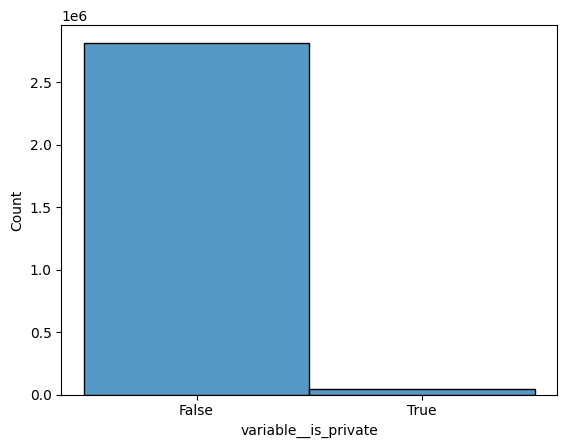

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [11]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 44635 valores verdaderos y 2817670 valores falsos. Y, la desviación típica es de 0.12389877438545227
La frecuencia con la que programa puede tener la variable is_private a True es 0.015594075404263347.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9844059245957366.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 98.44% de los items.
La variable variable__is_private toma el valor de 1.0 en un 1.559% de los items.


In [13]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,44635.000000,44635.0,44635.0,44635.0,44635.0,44635.0,44635.0,44635.000000,44635.000000,44635.000000,44635.000000,44635.000000
mean,13.609074,1.0,0.0,0.0,0.0,0.0,0.0,0.128375,0.743430,0.128195,0.465666,0.534334
std,7.060709,0.0,0.0,0.0,0.0,0.0,0.0,0.334510,0.436745,0.334311,0.498825,0.498825
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,18.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,53.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

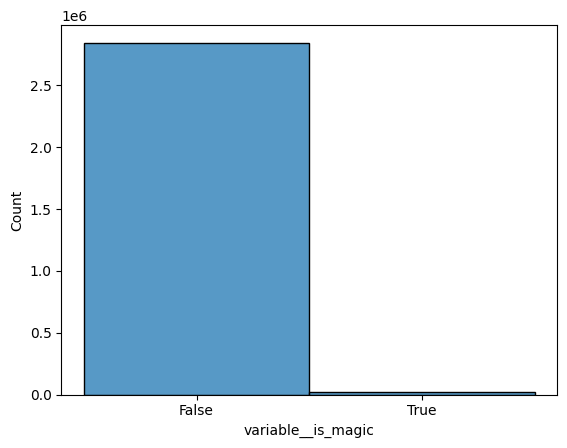

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 19279 valores verdaderos y 2843026 valores falsos. Y, la desviación típica es de 0.08179312944412231
La frecuencia con la que programa puede tener la variable is_magic a True es 0.006735480670298937.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9932645193297011.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.33% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.6735% de los items.


In [17]:
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,19279.000000,19279.0,19279.0,19279.0,19279.0,19279.000000,19279.0,19279.000000,19279.000000,19279.000000,19279.000000,19279.000000
mean,4.965818,0.0,1.0,0.0,0.0,0.456663,0.0,0.000986,0.540277,0.002075,0.256341,0.743659
std,3.767730,0.0,0.0,0.0,0.0,0.498131,0.0,0.031378,0.498388,0.045504,0.436624,0.436624
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,8.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,25.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 82. Con una media de 7.12.

<Axes: ylabel='variable__number_of_characters'>

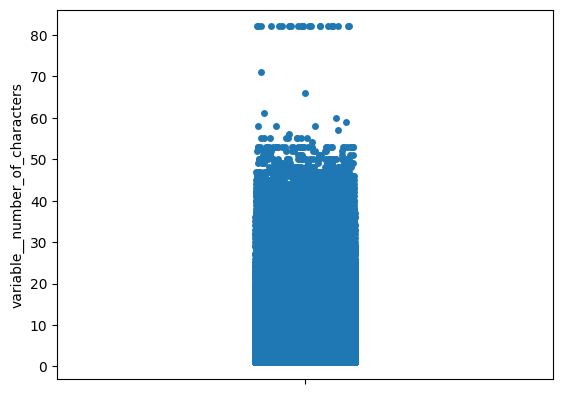

In [18]:
sns.stripplot(X['variable__number_of_characters'])

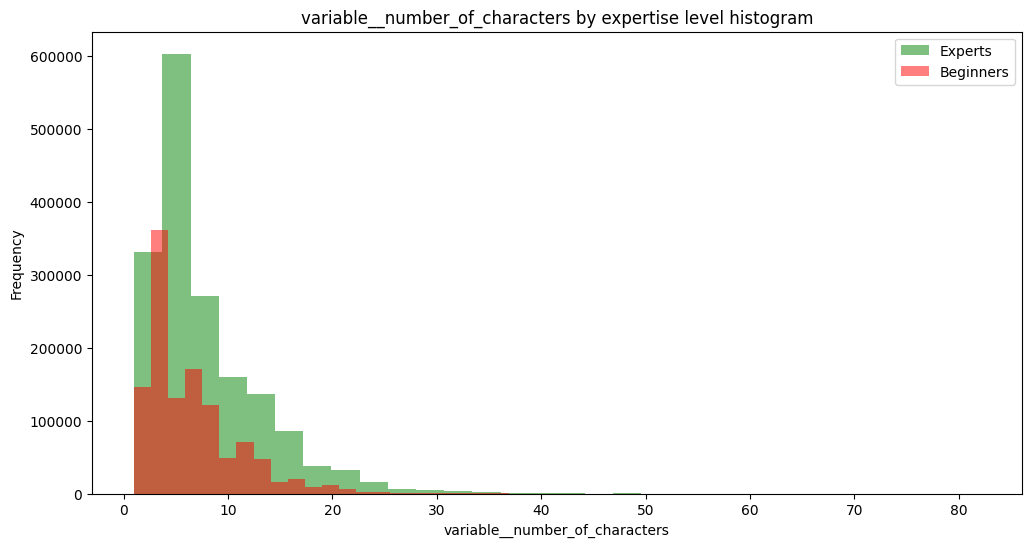

In [19]:
print_histogram(X, 'variable__number_of_characters', 'variable__expertise_level', bins=30, include_all=False)

In [20]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7352931096724329
Rango valores atípicos extremos (Tukey): [-14.0,28.0]
Rango valores atípicos leves (Tukey): [-5.0,19.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.3136045135517564,180.44233289543982]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -14.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 86825 instancias tienen un valor para variable__number_of_characters superior a 19.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 3.033% del total de instancias.
+3.0IQR: 12705 instancias tienen un valor para variable__number_of_characters superior a 28.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 0.443

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 28.0 (Con un MC de 73 usamos Tuckey Extremo)

In [21]:
X[X['variable__number_of_characters'] > 28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,12705.000000,12705.000000,12705.0,12705.000000,12705.000000,12705.0,12705.0,12705.000000,12705.000000,12705.000000,12705.000000,12705.000000
mean,33.522312,0.128689,0.0,0.009209,0.142621,0.0,0.0,0.033845,0.484927,0.329398,0.132704,0.867296
std,4.925228,0.334869,0.0,0.095524,0.349700,0.0,0.0,0.180837,0.499792,0.470013,0.339268,0.339268
min,29.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,32.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
max,82.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (4/4)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

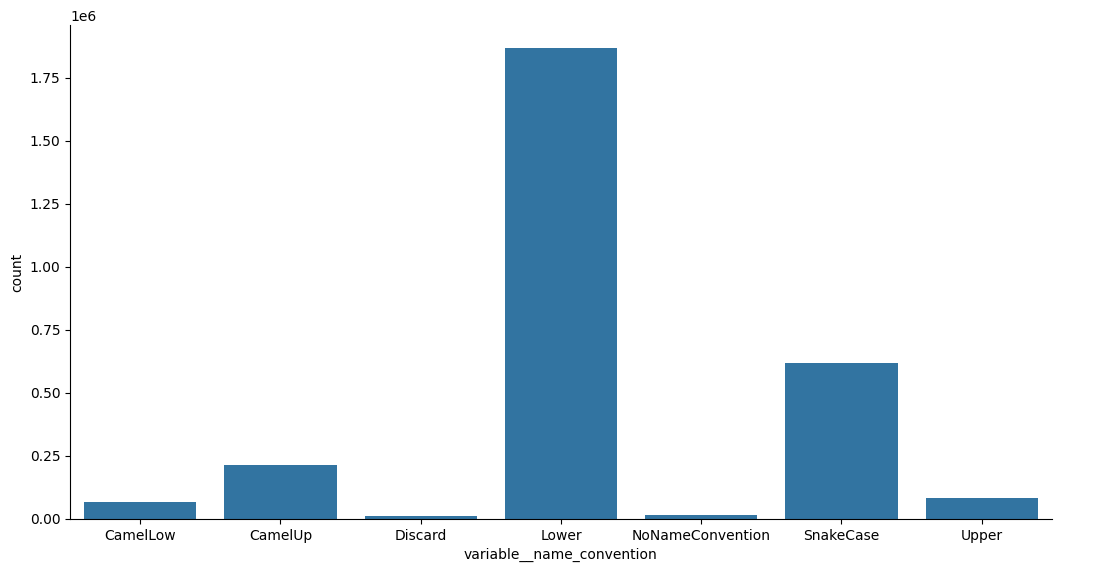

In [22]:
print_categorical_histogram(full_table, 'variable__name_convention')

In [23]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 65.2% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 21.54% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 7.395% de los items.
La variable variable__name_convention toma el valor de Upper en un 2.83% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 2.291% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.4348% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.3076% de los items.


In [24]:
print_values_usage_for_cat_var(full_table, 'variable__name_convention', NAMING_CONVENTION_VALUES)

La variable variable__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [25]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,variable__name_convention,variable__number_of_characters,variable__is_private,variable__is_magic,variable__expertise_level
3354,SnakeCase,27,True,False,BEGINNER
3806,NoNameConvention,34,True,False,BEGINNER
3860,NoNameConvention,34,True,False,BEGINNER
4582,SnakeCase,25,True,False,BEGINNER
4586,SnakeCase,26,True,False,BEGINNER
...,...,...,...,...,...
2808075,SnakeCase,43,True,False,EXPERT
2838164,SnakeCase,37,True,False,EXPERT
2852622,NoNameConvention,30,True,False,EXPERT
2852626,NoNameConvention,30,True,False,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [26]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,3389.0,24.305990,7.870590,13.0,18.0,23.0,30.0,53.0
variable__is_private,3389.0,0.997344,0.051472,0.0,1.0,1.0,1.0,1.0
variable__is_magic,3389.0,0.002656,0.051472,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,3389.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelUp,3389.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Discard,3389.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Lower,3389.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_NoNameConvention,3389.0,0.266450,0.442168,0.0,0.0,0.0,1.0,1.0
variable__name_convention_SnakeCase,3389.0,0.321629,0.467170,0.0,0.0,0.0,1.0,1.0
variable__name_convention_Upper,3389.0,0.411921,0.492254,0.0,0.0,0.0,1.0,1.0


In [27]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,2858916.0,7.098454,5.141809,1.0,4.0,5.0,10.0,82.0
variable__is_private,2858916.0,0.014430,0.119256,0.0,0.0,0.0,0.0,1.0
variable__is_magic,2858916.0,0.006740,0.081822,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,2858916.0,0.022938,0.149705,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelUp,2858916.0,0.074035,0.261828,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,2858916.0,0.003079,0.055408,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Lower,2858916.0,0.652751,0.476096,0.0,0.0,1.0,1.0,1.0
variable__name_convention_NoNameConvention,2858916.0,0.004037,0.063408,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,2858916.0,0.215314,0.411040,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Upper,2858916.0,0.027846,0.164531,0.0,0.0,0.0,0.0,1.0
